# MLE and Naïve Bayes

## T1 and OT1

\begin{align*}
\arg \max_\alpha&\ Pr(y_N, y_{N-1}, \ldots, y_1, y_0 ; \alpha) \\
= \arg \max_\alpha&\ Pr(\bigcap_{i=0}^{N}y_i; \alpha) \\
= \arg \max_\alpha&\ Pr(y_N | \bigcap_{i=0}^{N-1}y_i; a)Pr(\bigcap_{i=0}^{N-1}y_i; a)\\
= \arg \max_\alpha&\ Pr(y_0; \alpha) \prod_{i=1}^N Pr(y_i|\bigcap_{j=0}^{i-1}y_j ; \alpha) & \quad \left( \text{Apply probabilistic Chain rule} \right) \\
= \arg \max_\alpha&\ Pr(y_0; \alpha)\prod_{i=1}^NPr(y_i|y_{i-1}; \alpha) & \quad \left( \text{$y_i$ is Markov Process} \right) \\
= \arg \max_\alpha&\ Pr(y_0)\prod_{i=1}^NPr(y_i|y_{i-1}; \alpha) & \quad \left(y_0 \text{ is independent to } \alpha\right)\\
= \arg \max_\alpha&\ \mathcal{N}\left(y_0; 0, \lambda \right)\prod_{i=1}^N\mathcal{N}\left(y_i; \alpha y_{i-1}, \sigma^2\right) \\
= \arg \max_\alpha&\  \log\mathcal{N}\left(y_0; 0, \lambda \right) + \sum_{i=1}^N \log \mathcal{N}\left(y_i; \alpha y_{i-1}, \sigma^2\right) & \quad \left(\text{Take log on likelihood} \right) \\
= \arg \max_\alpha&\ \log\frac{1}{\sqrt{2\pi\lambda}} + N\log\frac{1}{\sqrt{2\pi\sigma^2}}+ \frac{-y_0^2}{2\lambda} + \sum_{i=1}^N\frac{-(y_i-\alpha y_{i-1})^2}{2\sigma^2} \\
\end{align*}

$\text{Take Derivative to calculate argument max}$

\begin{align*}
\frac{\partial}{\partial \alpha} \left( \log\frac{1}{\sqrt{2\pi\lambda}} + N\log\frac{1}{\sqrt{2\pi\sigma^2}}+ \frac{-y_0^2}{2\lambda} + \sum_{i=1}^N\frac{-(y_i-\alpha y_{i-1})^2}{2\sigma^2} \right) &= 0 \\
\sum_{i=1}^N\frac{-2(y_i-\alpha y_{i-1})}{2\sigma^2}\frac{\partial}{\partial \alpha}(y_i-\alpha y_{i-1})  &= 0 \\
\sum_{i=1}^N\frac{-2(y_i-\alpha y_{i-1})}{2\sigma^2}(-y_{i-1})  &= 0 \\
\sum_{i=1}^N(y_i-\alpha y_{i-1})y_{i-1} &= 0 \\
\sum_{i=1}^Ny_i \cdot y_{i-1} - \alpha \sum_{i=1}^Ny_{i-1}^2 &= 0 \\
\therefore \alpha = \frac{\sum_{i=1}^Ny_i \cdot y_{i-1}}{\sum_{i=0}^{N-1}y_{i}^2}
\end{align*}

$\text{For } \textbf{T1} \text{ the answer is}$
$$\alpha = \frac{y_2y_1 + y_1y_0}{y_1^2 + y_0^2}$$

## T2

 
\begin{align*}
P(w_1 | x) &= P(w_2 | x) \\
P(x | w_1)P(w_1) &= P(x | w_2)P(w_2) \\
P(x | w_1) &= P(x | w_2) & \because P(w_1)=P(w_2) \\
\mathcal{N}(x; 4, 2) &= \mathcal{N}(x; 0, 2) \\
\frac{1}{\sqrt{2\pi\cdot 2}}\exp\left( \frac{-(x-4)^2}{2 \cdot 2} \right) &= \frac{1}{\sqrt{2\pi\cdot 2}}\exp\left( \frac{-(x-0)^2}{2 \cdot 2} \right) \\
(x-4)^2 &= x^2 \\
(2x-4)(-4) &= 0 \\
x &= 2
\end{align*}

The decision boundary is $x=2$

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm

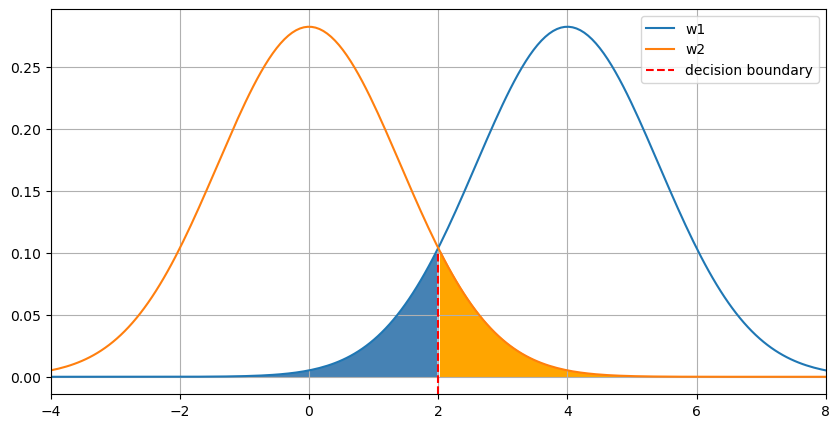

In [3]:
x = np.linspace(-4.0, 8.0, 200)
fig = plt.figure(figsize = (10, 5))

plt.xlim((-4, 8))
# w1 : N(4, 2)
plt.plot(x, norm.pdf(x, 4, np.sqrt(2)), label = 'w1')
plt.fill_between(x, norm.pdf(x, 4, np.sqrt(2)), where = (x<=2), color='steelblue')
# w2: N(0, 2)
plt.plot(x, norm.pdf(x, 0, np.sqrt(2)), label = 'w2')
plt.fill_between(x, norm.pdf(x, 0, np.sqrt(2)), where = (x>=2), color='orange')


#  decision boundary x = 2
plt.axvline(x=2, ymax= norm.pdf(2, 0, np.sqrt(2)) / norm.pdf(0, 0, np.sqrt(2)) , color='r', linestyle='--', label='decision boundary')

plt.legend()
plt.grid()
plt.show()

## T3

\begin{align*}
P(w_1 | x) &= P(w_2 | x) \\
P(x | w_1)P(w_1) &= P(x | w_2)P(w_2) \\
P(x | w_1)(0.75) &= P(x | w_2)(0.25) \\
3 &= \frac{\mathcal{N}(x; 0, 2)}{\mathcal{N}(x; 4, 2)} \\
3 &= \frac{\exp(-x^2/4)}{ \exp(-(x-4)^2 / 4)} \\
4\ln 3 &= (x-4)^2-x^2 \\
4\ln 3 &= (2x-4)(-4) \\
x &= \frac{4-\ln 3}{2} \\
\end{align*}

$\therefore$ The decision boundary is $x = \frac{4-\ln 3}{2} \approx 1.45069$


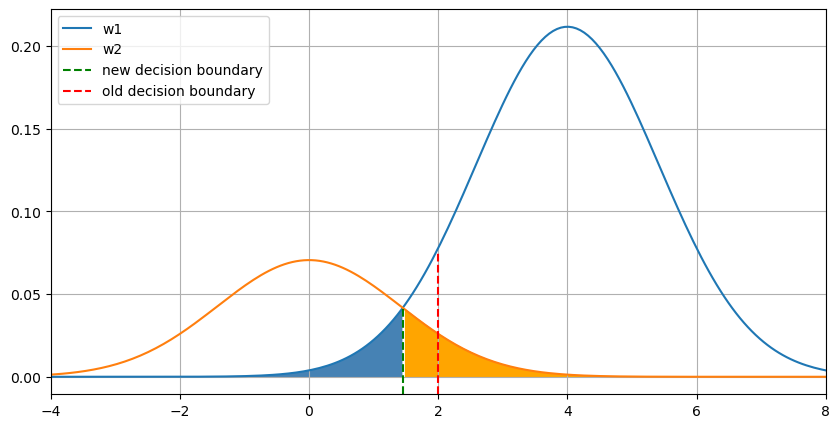

In [4]:
x = np.linspace(-4.0, 8.0, 200)
fig = plt.figure(figsize = (10, 5))

plt.xlim((-4, 8))

boundary = (4 - np.log(3)) / 2

# w1 : N(4, 2)
plt.plot(x, 0.75 * norm.pdf(x, 4, np.sqrt(2)), label = 'w1')
plt.fill_between(x, 0.75 * norm.pdf(x, 4, np.sqrt(2)), where = (x<=boundary), color='steelblue')
# w2: N(0, 2)
plt.plot(x, 0.25 * norm.pdf(x, 0, np.sqrt(2)), label = 'w2')
plt.fill_between(x, 0.25 * norm.pdf(x, 0, np.sqrt(2)), where = (x>=boundary), color='orange')
#  decision boundary x = 2

plt.axvline(x=boundary, ymax=  norm.pdf(boundary, 4, np.sqrt(2))  / norm.pdf(4, 4, np.sqrt(2)) + 0.025, color='g', linestyle='--', label='new decision boundary')
plt.axvline(x=2, ymax=norm.pdf(2, 0, np.sqrt(2)) / norm.pdf(4, 4, np.sqrt(2)) , color='r', linestyle='--', label='old decision boundary')


plt.legend()
plt.grid()
plt.show()

## OT2

\begin{align*}
\mathcal{N}(x; \mu_1, \sigma^2) &= \mathcal{N}(x; \mu_2, \sigma^2) \\
\exp\left(-\frac{(x-\mu_1)^2}{2\sigma^2}\right) &= \exp\left(-\frac{(x-\mu_2)^2}{2\sigma^2}\right) & \because \sigma \text{ is equal}\\
(x-\mu_1)^2 &= (x-\mu_2)^2 \\
(x-\mu_1)^2 - (x-\mu_2)^2 &= 0 \\
(2x-\mu_1-\mu_2)(\mu_2 - \mu_1) &= 0 \\
x &= \frac{\mu_1 + \mu_2}{2} & \text{where } \mu_1 \ne \mu_2
\end{align*}

## OT3

\begin{align*}
\mathcal{N}(x;4, 2) &= \mathcal{N}(x;0, 4) \\
\frac{1}{\sqrt{2\pi\cdot 2}}\exp\left( \frac{-(x-4)^2}{2 \cdot 2} \right) &= \frac{1}{\sqrt{2\pi\cdot 4}}\exp\left( \frac{-(x-0)^2}{2 \cdot 4} \right) \\
\sqrt{2} &= \exp\left(-\frac{x^2}{8} + \frac{(x-4)^2}{4}\right)\\
\frac{1}{2}\ln2 &= -\frac{x^2}{8} + \frac{(x-4)^2}{4} \\
4\ln2 &= 2(x-4)^2 - x^2 \\
x^2 - 16x + (32 - 4\ln2) &= 0 \\
x &\approx 2.10317, 13.8968 & \because x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
\end{align*}

$\text{Choose } x = 2.10317 \text{ because } 0 \le 2.10317 \le 4$

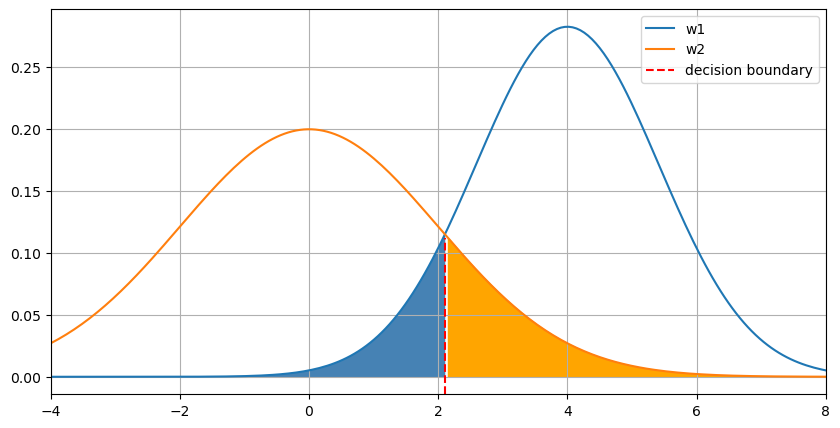

In [5]:
x = np.linspace(-4.0, 8.0, 200)
fig = plt.figure(figsize = (10, 5))

plt.xlim((-4, 8))

boundary = 2.10317
# w1 : N(4, 2)
plt.plot(x, stats.norm.pdf(x, 4, np.sqrt(2)), label = 'w1')
plt.fill_between(x, norm.pdf(x, 4, np.sqrt(2)), where = (x<=boundary), color='steelblue')
# w2: N(0, 4)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(4)), label = 'w2')
plt.fill_between(x, norm.pdf(x, 0, np.sqrt(4)), where = (x>=boundary), color='orange')
#  decision boundary x = 2

plt.axvline(x=boundary, ymax=norm.pdf(boundary, 4, np.sqrt(2)) / norm.pdf(4, 4, np.sqrt(2)) , color='r', linestyle='--', label='decision boundary')


plt.legend()
plt.grid()

# Employee Attrition Prediction

In [6]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [7]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0

cat_cols = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'OverTime']
for col in cat_cols:
    df[col] = pd.Categorical(df[col]).codes
    df.loc[df[col] == -1, col] = np.nan
    
df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,0.0,...,NaN,1.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0.0,NaN,279.0,1.0,NaN,NaN,1.0,3.0,1.0,...,NaN,4.0,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1.0,NaN,1373.0,NaN,2.0,2.0,NaN,NaN,1.0,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0.0,1.0,1392.0,1.0,3.0,4.0,1.0,NaN,0.0,...,3.0,3.0,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0.0,2.0,591.0,1.0,2.0,1.0,3.0,1.0,1.0,...,3.0,4.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train, df_test = train_test_split(df, test_size = 0.1, random_state = 42, stratify = df['Attrition'])

## T4

Age column has 0 bins zero counts 
MonthlyIncome column has 0 bins zero counts 
DistanceFromHome column has 11 bins zero counts 


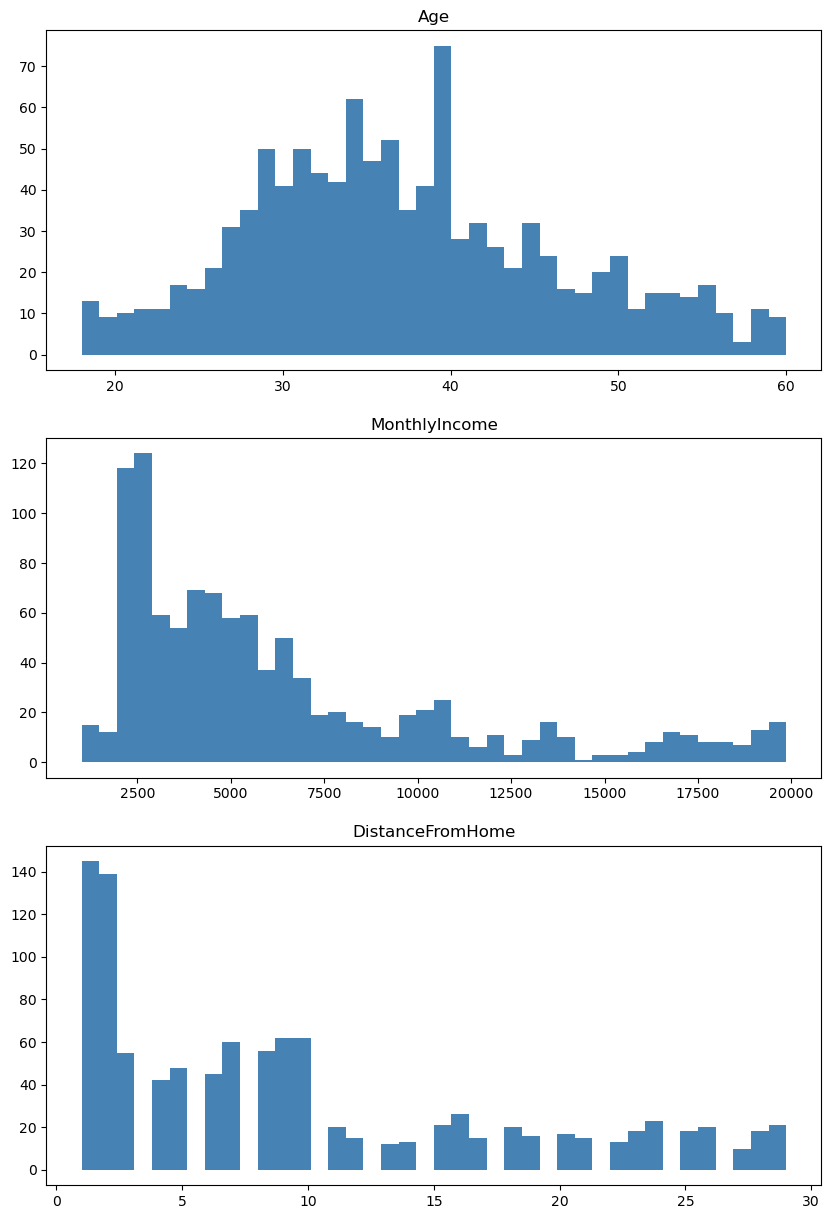

In [10]:
cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
fig, ax = plt.subplots(3, figsize=(10, 15))

for i, col in enumerate(cols):
    train_col_no_nan = df_train[~df_train[col].isna()][col]
    hist, bin_edge = np.histogram(train_col_no_nan, 40)
    
    print(f'{col} column has {(hist == 0).sum()} bins zero counts ')
    
    ax[i].set_title(col) 
    ax[i].fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    
plt.show()

**Age** and **MonthlyIncome** have a good discretization because there is no sparse in data, <br>
On the other hand, **DistanceFromHome** has total 11 empty bins the sparse of data in this feature. <br>
The test data have a chance to appear in the empty bins so that will make the probability value zero therefore the DistanceFromHome feature is bad discretization.

## T5

We can you Gaussian estimate for an Age feature because the histogram looks like it is a Gaussian distribution.<br>
The Monthly Income and DistanceFromHome have the right skewness so it is not good to eliminate with the Gaussian.<br>


the **Gaussian Mixture Model (GMM)** can estimate all feature include  **Monthly Income** and **DistanceFromHome** <br>
because it handles the skewness by divide the histogram and make each of divided histogram to Gaussian Distribution.

## T6

In [11]:
def plot_discretize_hist(df, col, bins, ax):
    train_col_no_nan = df[~df[col].isna()][col]
    hist, bin_edge = np.histogram(train_col_no_nan, bins=bins)
    
    ax.set_title(f'{col}, bins={bins}')
    ax.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    
    discretized_col = np.digitize(train_col_no_nan, bin_edge)
    return discretized_col
    

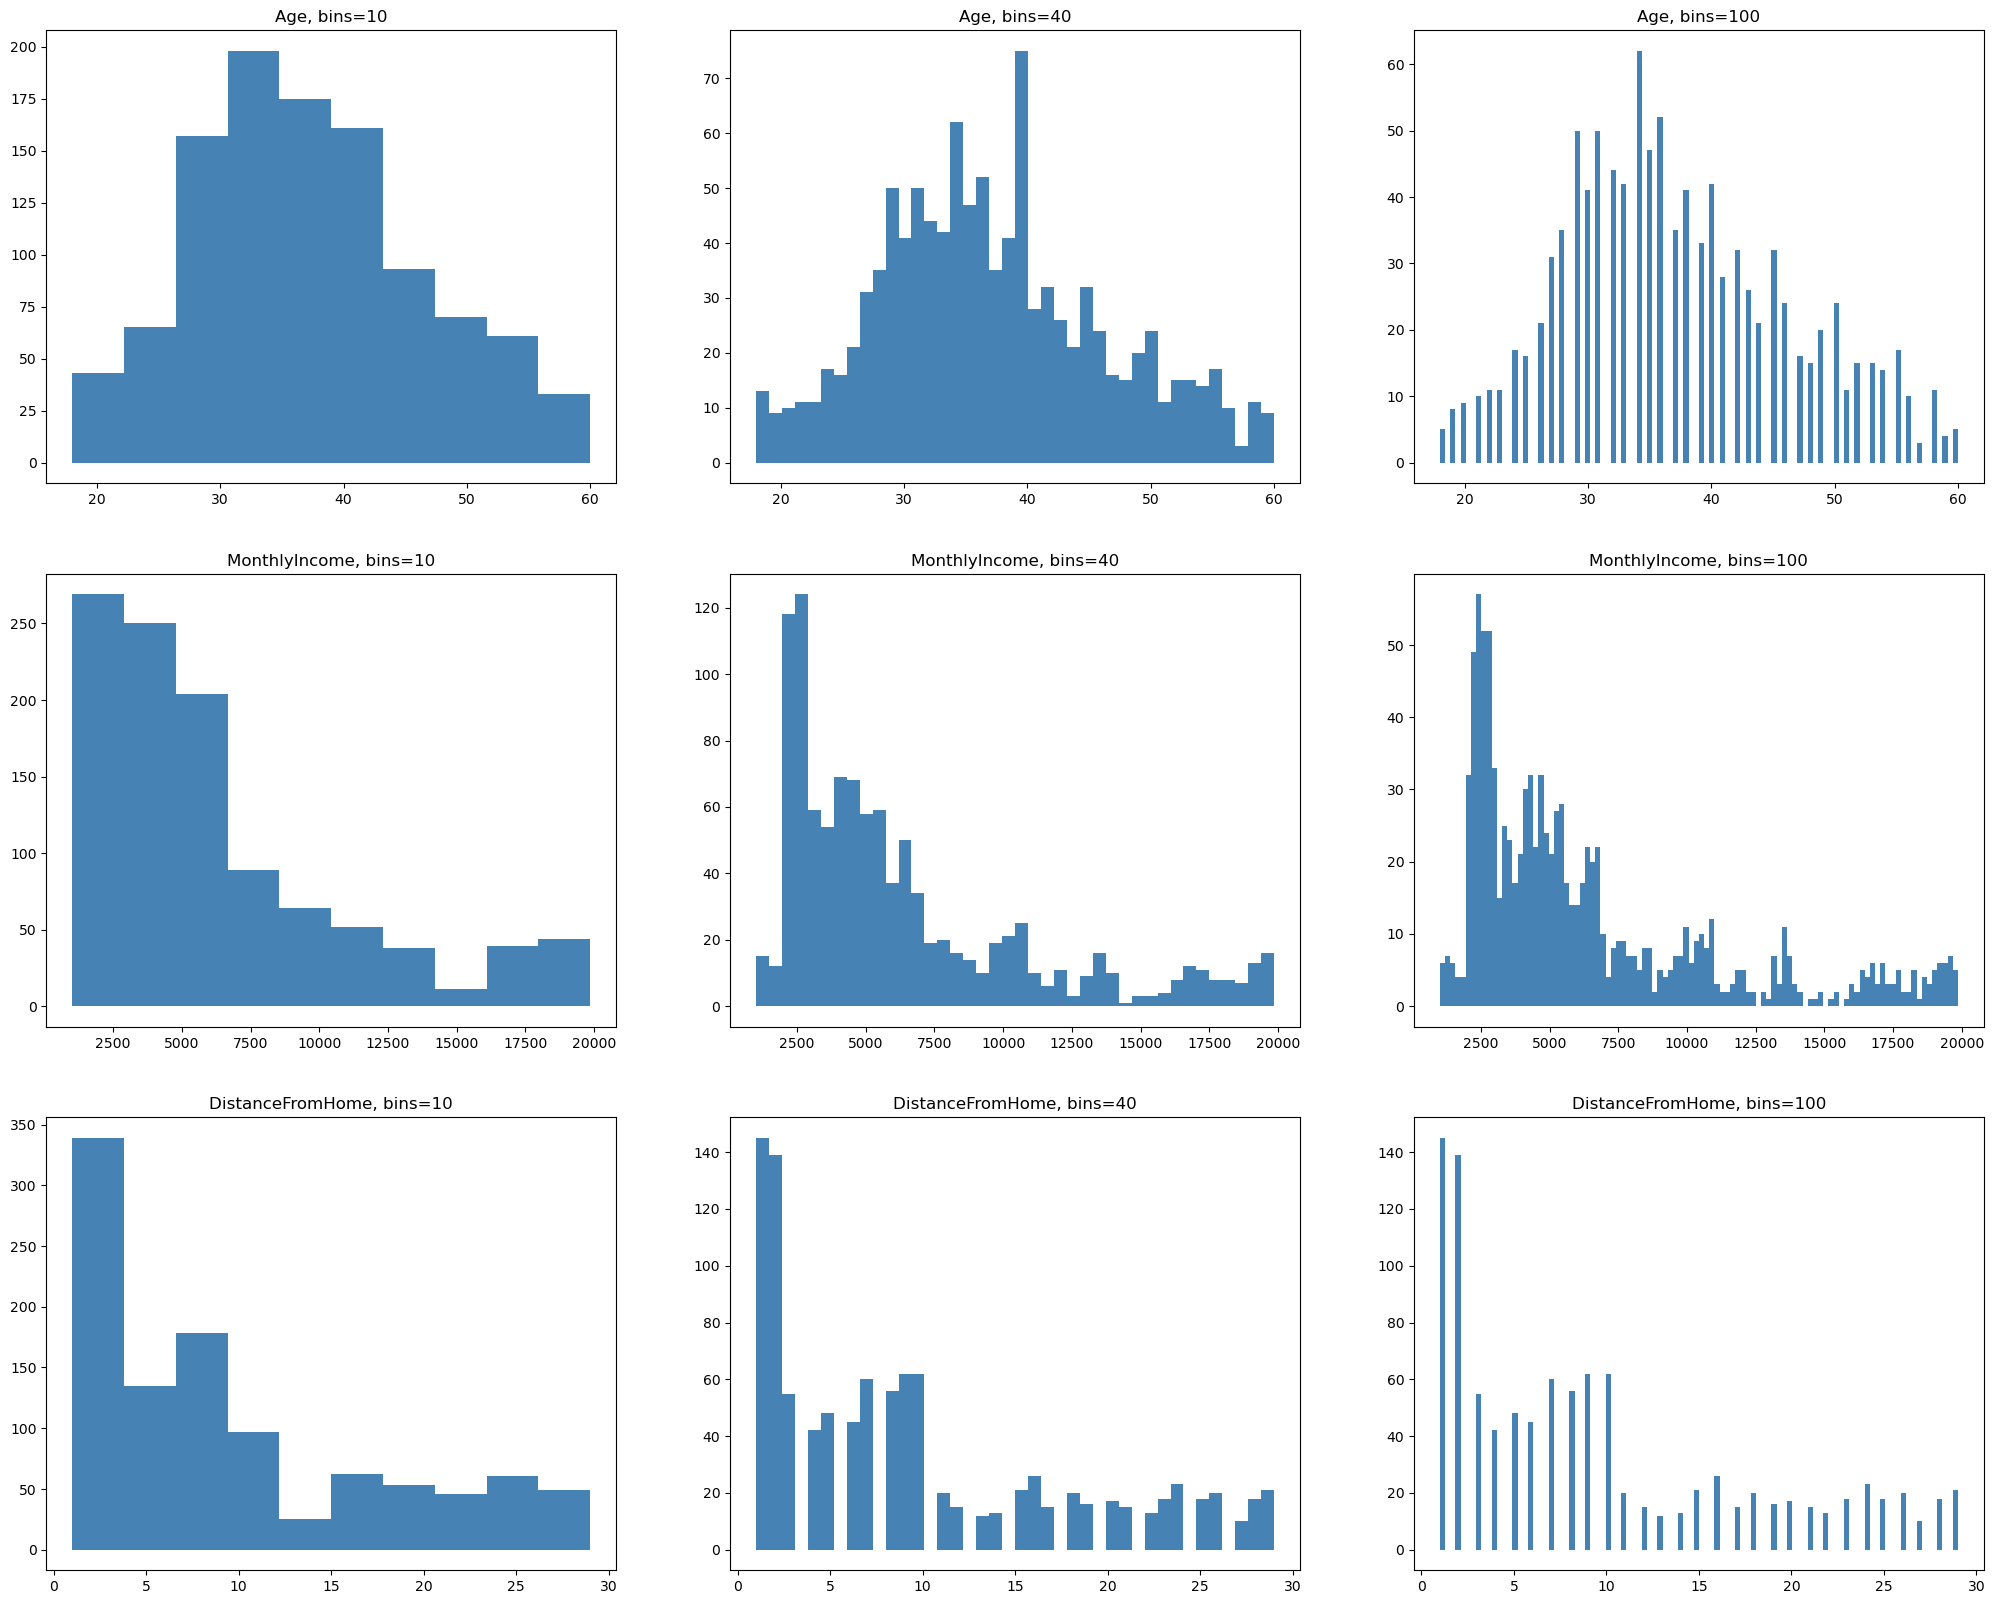

In [12]:
all_bins = [10, 40, 100]

fig, ax = plt.subplots(3, 3, figsize=(25, 20))
for i, col in enumerate(cols):
    for j, bins in enumerate(all_bins):
        plot_discretize_hist(df_train, col, bins, ax[i, j])

plt.show()

Considering the bins size of each feature by the sparseness of histogram

**Age** - bins = 40

**MonthlyIncome**  - bins = 40 ( The bins=100 look good but has a little sparse)

**DistanceFromHome** - bins = 10

## T7

In [13]:
num_cols = np.setdiff1d(df_train.columns, np.array(cat_cols))
for col in num_cols:
    train_col_no_nan = df_train[~df_train[col].isna()][col]
    hist, bin_edge = np.histogram(train_col_no_nan, bins=10)
    if (zero_cnt := (hist == 0).sum()) == 0:
        print(f'{col} column has {zero_cnt} bins zero counts ')

Age column has 0 bins zero counts 
DailyRate column has 0 bins zero counts 
DistanceFromHome column has 0 bins zero counts 
HourlyRate column has 0 bins zero counts 
MonthlyIncome column has 0 bins zero counts 
MonthlyRate column has 0 bins zero counts 
NumCompaniesWorked column has 0 bins zero counts 
PercentSalaryHike column has 0 bins zero counts 
TotalWorkingYears column has 0 bins zero counts 
YearsAtCompany column has 0 bins zero counts 
YearsInCurrentRole column has 0 bins zero counts 
YearsSinceLastPromotion column has 0 bins zero counts 
YearsWithCurrManager column has 0 bins zero counts 


### Feature should Discretize
Age, DailyRate, DistanceFromHome, HourlyRate, JobRole, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

because these features have no 0 bins counts

## T8

Distribution: **Multinomial Distribution**
$$
X \sim multinomial(\textbf{p}, n)
$$


MLE of Multinomial Distribution:

$$
p_i = \frac{\text{size of bin}_i}{\#\text{samples data}}
$$

In [14]:
def plot_likelihood(df, col, cl, ax):
    attrition_match = df[df['Attrition'] == cl]
    ax.hist(attrition_match.loc[~attrition_match[col].isna(), col], bins=10)
    ax.set_title(f"{col}, { 'Stay' if cl==0 else 'Leave' }")
    

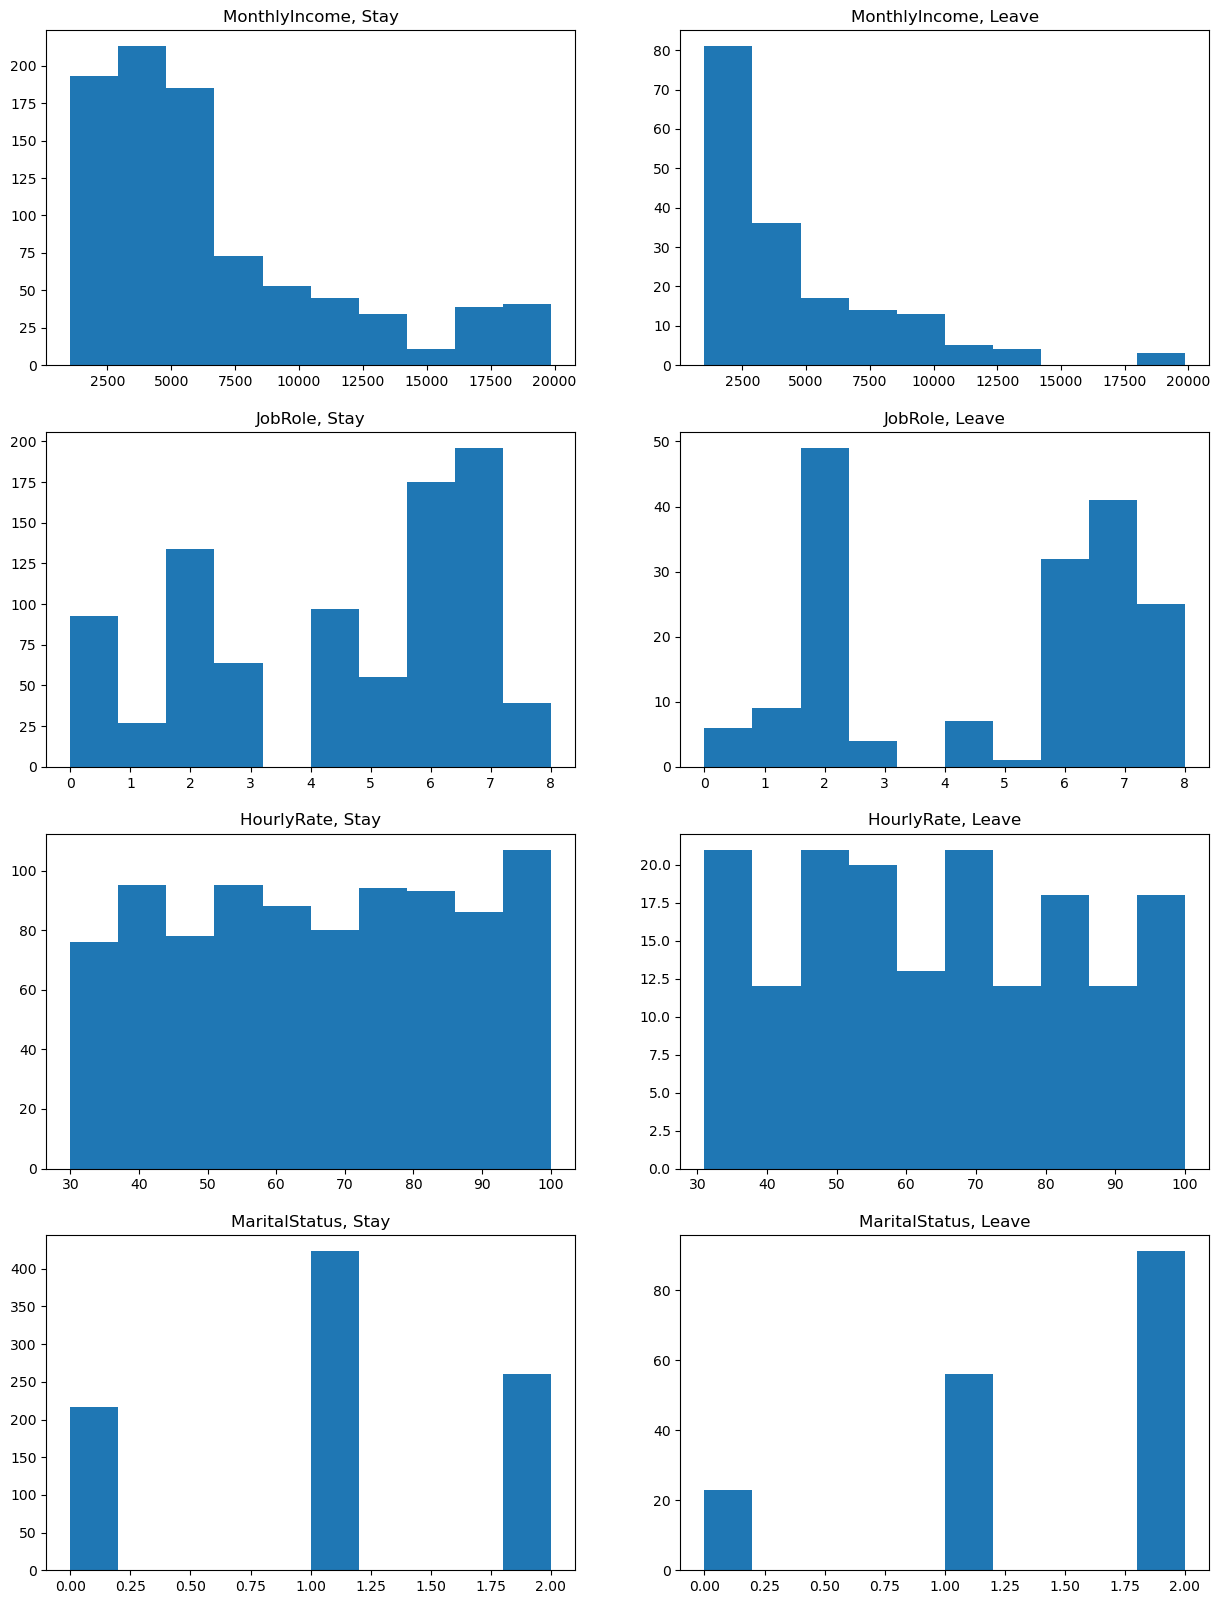

In [15]:
cols = ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

for i,col in enumerate(cols):
    for cl in range(2):
        plot_likelihood(df_train, col, cl, ax[i, cl])

plt.show()

## T9
**Binomial Distribution** because Attrition has only two classes (Stay, Leave) same as flipping coin.

## T10
1. Flooring: use small value instead (1e-10, 1e-8)
2. Smoothing: smooth the values using counts from other observations (mean of adjacent bin, etc.)
3. Use priors (MAP adaptation)

## T11

In [16]:
class Simple_Binary_BayesClassifier_Hist:
    def __init__(self, bins=10, threshold=0):
        self.bins = bins
        self.threshold = threshold
        
    
    def _discretize_test(self, dat, feature_index):
        return np.digitize(dat, self.bin_edges[feature_index])
        
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Calculate prior
        self.priors = [np.sum(y == w) / num_samples for w in range(2)]
        
        bin_edges = []
        features_prob = [[], []]
        
        for feature_index in range(num_features):
            non_nan_mask = ~np.isnan(X[:, feature_index])
            
            cur_feature_no_nan = X[non_nan_mask, feature_index]
            cur_class_no_nan = y[non_nan_mask]
            
            _, bin_edge = np.histogram( cur_feature_no_nan, bins = self.bins )
            bin_edge[0], bin_edge[-1] = -np.inf, np.inf # Expand edge
            
            for w in range(2):
                current_feature_class = cur_feature_no_nan[cur_class_no_nan == w]
                hist, _ = np.histogram( current_feature_class , bins = bin_edge)
                bins_prob = hist / len(current_feature_class)
                bins_prob[bins_prob == 0] = 1e-6 # Flooring
                features_prob[w].append(bins_prob.tolist())
                
            bin_edges.append(bin_edge)
        
        self.bin_edges = np.array(bin_edges)
        self.features_prob = np.array(features_prob)
        return self
            
    
    def predict(self, _X, threshold = None, get_prob = False):
        if threshold == None:
            threshold = self.threshold
            
        X = _X.copy()
        # Discretize X
        _, num_features = X.shape
        for feature_index in range(num_features):
            non_nan_mask = ~np.isnan(X[:, feature_index])
            X[non_nan_mask, feature_index] = np.digitize(X[non_nan_mask, feature_index], self.bin_edges[feature_index]) # Binning
            
        prediction = []
        for data in X:
            lH = np.log(self.priors[1]) - np.log(self.priors[0])
            lH += sum([ np.log(self.features_prob[ 1, feature_index, int(data[feature_index]) - 1 ])
                       -np.log(self.features_prob[ 0, feature_index, int(data[feature_index]) - 1 ]) 
                        if not np.isnan(data[feature_index]) else 0
                        for feature_index in range(num_features)
                      ])
            if get_prob:
                prediction.append(np.exp(lH))
            else:
                prediction.append(1 if lH > threshold else 0)

        return np.array(prediction)
    
    def predict_proba(self, _X):
        return self.predict(_X, None, get_prob=True)

In [17]:
X_train = df_train.drop(columns='Attrition').to_numpy()
y_train = df_train['Attrition'].to_numpy()
X_test = df_test.drop(columns='Attrition').to_numpy()
y_test = df_test['Attrition'].to_numpy()

classifier_hist = Simple_Binary_BayesClassifier_Hist().fit(X_train, y_train)
y_pred = classifier_hist.predict(X_test)

In [18]:
def precision_score(y_test, y_pred):
    if np.sum(y_pred == 1) == 0:
        return 0
    return np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_pred == 1)

def recall_score(y_test, y_pred):
    if np.sum(y_test == 1) == 0:
        return 0
    return np.sum((y_test == 1) & (y_pred == 1)) / np.sum(y_test == 1)

def f1_score(y_test, y_pred):
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    if(prec + recall == 0): 
        return 0
    return 2 * prec * recall / (prec + recall)

def accuracy_score(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

def fpr_rate(y_test, y_pred):
    return np.sum((y_test == 0) & (y_pred == 1)) / np.sum(y_test == 0)


def roc_curve(y, prob):
    thresholds = np.sort( np.block([0, np.unique(prob), 1]) )
    fpr, tpr = [], []
    for threshold in thresholds:
        y_pred = prob >= threshold
        fpr.append( fpr_rate(y, y_pred) )
        tpr.append( recall_score(y, y_pred) )
    return fpr, tpr

def confusion_matrix(y_test, y_pred):
    return np.array([ 
            [np.sum((y_test == 0) & (y_pred == 0)), np.sum((y_test == 0) & (y_pred == 1))] , 
            [np.sum((y_test == 1) & (y_pred == 0)), np.sum((y_test == 1) & (y_pred == 1))]
        ])

def classification_report(y_test, y_pred):
    s = '\tprecision\trecall\t\tf1-score\n'
    s += f'\t{precision_score(y_test, y_pred):.2f}\t\t{recall_score(y_test, y_pred):.2f}\t\t{f1_score(y_test, y_pred):.2f}\n'
    s += f'accuracy: {accuracy_score(y_test, y_pred):.2f}'
    return s



	precision	recall		f1-score
	0.38		0.38		0.38
accuracy: 0.80


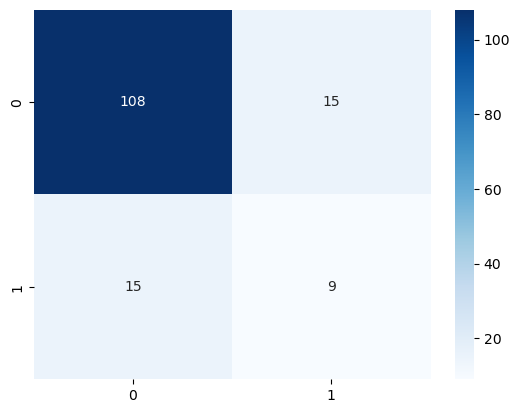

In [19]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt='g', cmap='Blues')
plt.show()

## T12

In [20]:
class Simple_Binary_BayesClassifier_Gaussian:
    def __init__(self, threshold=0):
        self.threshold = threshold
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # Calculate prior
        self.priors = [np.sum(y == w) / num_samples for w in range(2)]
        dists = [[], []]
        for feature_index in range(num_features):
            cur_data = X[:, feature_index]
            for w in range(2):
                cur_data_class = cur_data[y == w]
                dists[w].append( norm(np.nanmean(cur_data_class), np.nanstd(cur_data_class)) )
        self.dists = np.array(dists)
        return self
    
    def predict(self, X, threshold=None, get_prob=False):
        if threshold == None:
            threshold = self.threshold
            
        _, num_features = X.shape
        prediction = []
        for data in X:
            lH = np.log(self.priors[1]) - np.log(self.priors[0])
            lH += sum([ np.log( self.dists[1, feature_index].pdf(data[feature_index]) )
                       -np.log( self.dists[0, feature_index].pdf(data[feature_index]) )
                       if not np.isnan(data[feature_index]) else 0
                       for feature_index in range(num_features)
                      ])
            
            if get_prob:
                prediction.append(np.exp(lH))
            else:
                prediction.append(1 if lH > threshold else 0)

        return np.array(prediction)
    
    def predict_proba(self, _X):
        return self.predict(_X, None, get_prob=True)

In [21]:
classifier_gaussian = Simple_Binary_BayesClassifier_Gaussian().fit(X_train, y_train)
y_pred = classifier_gaussian.predict(X_test)

	precision	recall		f1-score
	0.27		0.42		0.33
accuracy: 0.72


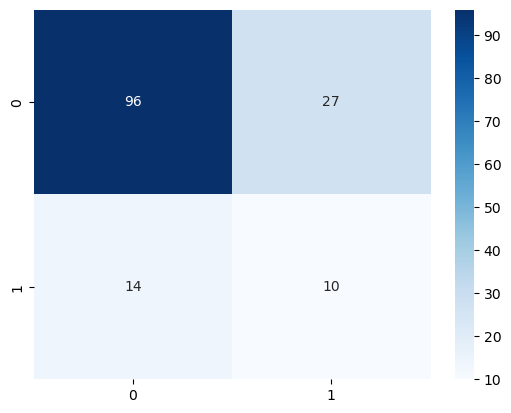

In [22]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt='g', cmap='Blues')
plt.show()

## T13

In [23]:
np.random.seed(42)

	precision	recall		f1-score
	0.13		0.38		0.19
accuracy: 0.49


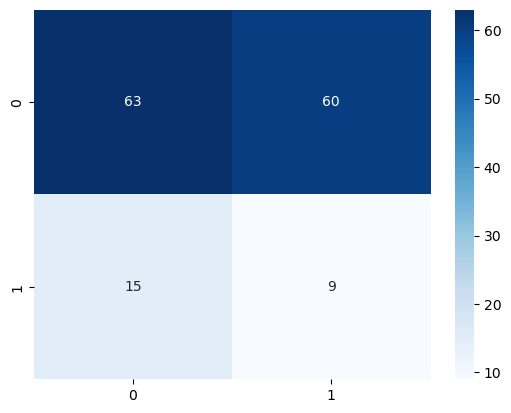

In [24]:
y_pred_baseline_1 = (np.random.rand(len(y_test)) >= 0.5).astype(int)
print(classification_report(y_test, y_pred_baseline_1))
sns.heatmap(confusion_matrix(y_test, y_pred_baseline_1), annot=True ,fmt='g', cmap='Blues')
plt.show()

## T14

In [25]:
unique, cnt = np.unique(y_train, return_counts = True)
print(unique, cnt, sep='\n')
frequent_class = unique[cnt.argmax()]

[0. 1.]
[1110  213]


	precision	recall		f1-score
	0.00		0.00		0.00
accuracy: 0.84


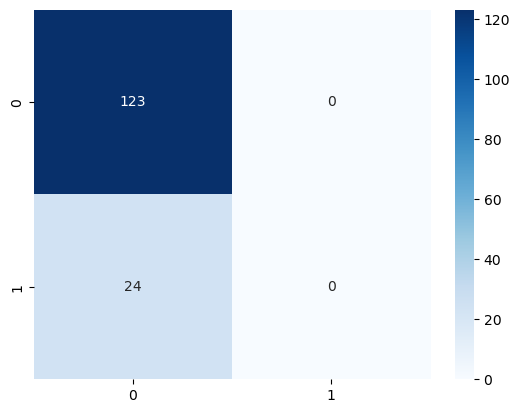

In [26]:
import warnings
warnings.filterwarnings(action='ignore')

y_pred_majority_rule = np.full(len(y_test) ,frequent_class)
print(classification_report(y_test, y_pred_majority_rule))
sns.heatmap(confusion_matrix(y_test, y_pred_majority_rule), annot=True ,fmt='g', cmap='Blues')

warnings.filterwarnings(action='default')

plt.show()

## T15

| Model | Recall | Precision | F1 | Accuracy |
| --- | --- | --- | --- | --- |
| Naïve Bayes Histogram  | .38 | .38 | .38 | .80 |
| Naïve Bayes Gaussian   | .27 | .42 | .32 | .72 |
| Baseline random        | .13 | .38 | .19 | .49 |
| Baseline majority rule | 0   | 0   | 0   | .84 |

## T16

In [27]:
t = np.arange(-5, 5, 0.05)

f1_max_hist = (-1, -1)
f1_max_gau = (-1, -1)
acc_max_hist = (-1, -1)
acc_max_gau = (-1, -1)

hist_classifier = Simple_Binary_BayesClassifier_Hist().fit(X_train, y_train)    
gaussian_classifier = Simple_Binary_BayesClassifier_Gaussian().fit(X_train, y_train)

for threshold in t:
    
    y_pred_hist = hist_classifier.predict(X_test, threshold)
    y_pred_gau = gaussian_classifier.predict(X_test, threshold)
    
    f1_max_hist = max( f1_max_hist, (f1_score(y_test, y_pred_hist), threshold) )
    f1_max_gau = max( f1_max_gau, (f1_score(y_test, y_pred_gau), threshold) )
    
    acc_max_hist = max( acc_max_hist, (accuracy_score(y_test, y_pred_hist), threshold) )
    acc_max_gau = max( acc_max_gau, (accuracy_score(y_test, y_pred_gau), threshold) )

In [28]:
print(f"Accuracy max Histogram {acc_max_hist[0]:.2f} at threshold {acc_max_hist[1]:.2f}")
print(f"Accuracy max Gaussian {acc_max_gau[0]:.2f} at threshold {acc_max_gau[1]:.2f}")


print(f"F1 max Histogram {f1_max_hist[0]:.2f} at threshold {f1_max_hist[1]:.2f}")
print(f"F1 max Gaussian {f1_max_gau[0]:.2f} at threshold {f1_max_gau[1]:.2f}")

Accuracy max Histogram 0.84 at threshold 4.95
Accuracy max Gaussian 0.84 at threshold 4.50
F1 max Histogram 0.46 at threshold -2.10
F1 max Gaussian 0.40 at threshold -1.15


## T17

In [29]:
def plot_roc(model, X, y, label):
    y_pred_prob = model.predict_proba(X)
    fpr, tpr = roc_curve(y, y_pred_prob)
    plt.plot(fpr, tpr, label=label)

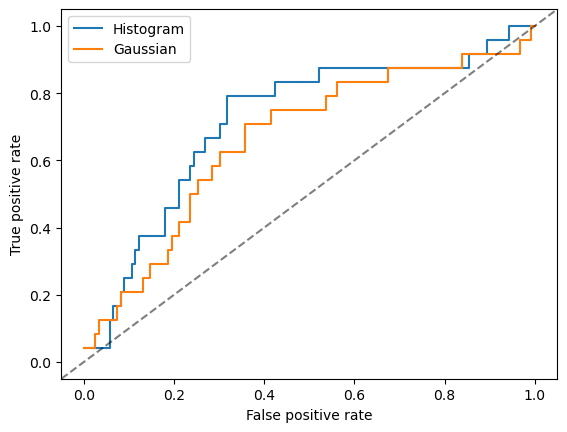

In [30]:
hist_bins10_classifier = Simple_Binary_BayesClassifier_Hist(bins=10).fit(X_train, y_train)
gaussian_classifier = Simple_Binary_BayesClassifier_Gaussian(threshold = threshold).fit(X_train, y_train)

plot_roc(hist_bins10_classifier, X_test, y_test, 'Histogram')
plot_roc(gaussian_classifier, X_test, y_test, 'Gaussian')

plt.axline((0, 0), slope=1, c='k', linestyle = '--', alpha=0.5)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## T18

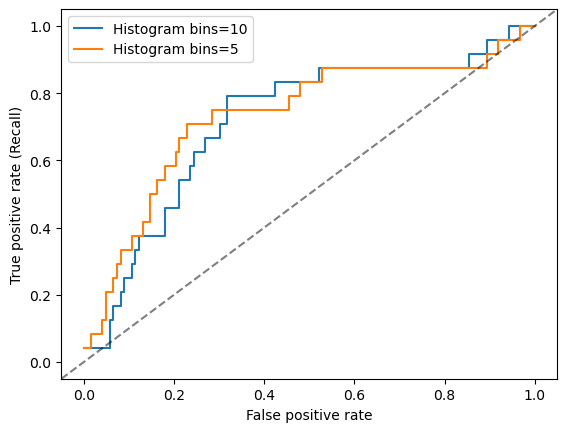

In [31]:
hist_bins5_classifier = Simple_Binary_BayesClassifier_Hist(bins=5).fit(X_train, y_train)

plot_roc(hist_bins10_classifier, X_test, y_test, 'Histogram bins=10')
plot_roc(hist_bins5_classifier, X_test, y_test, 'Histogram bins=5')

plt.axline((0, 0), slope=1, c='k', linestyle = '--', alpha=0.5)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Recall)')
plt.legend()
plt.show()

The **Employee Attrition** has consider **recall** over precision because the employee that leave has high affect to the company.

Considering to choose bins=10 over bins = 5, at FPR $\approx$ 0.3 is acceptable and TPR of bins=10 is higher than TPR of bins=5.

## T19
Submit your code (.py or .ipynb) on mycourseville.

## OT4

In [32]:
random_states = list(range(10))

acc_hist = []
acc_gau = []

for random_state in random_states:
    df_train, df_test = train_test_split(df, test_size = 0.1, random_state = random_state, stratify = df['Attrition'], shuffle=True)
    
    X_train = df_train.drop(columns='Attrition').to_numpy()
    y_train = df_train['Attrition'].to_numpy()
    X_test = df_test.drop(columns='Attrition').to_numpy()
    y_test = df_test['Attrition'].to_numpy()
    
    hist_classifier = Simple_Binary_BayesClassifier_Hist().fit(X_train, y_train)
    gaussian_classifier = Simple_Binary_BayesClassifier_Gaussian().fit(X_train, y_train)
    
    y_pred_hist = hist_classifier.predict(X_test)
    y_pred_gau = gaussian_classifier.predict(X_test)
    
    acc_hist.append(accuracy_score(y_test, y_pred_hist))
    acc_gau.append(accuracy_score(y_test, y_pred_gau))

acc_hist = np.array(acc_hist)
acc_gau = np.array(acc_gau)

print(f"Histogram discretize Naïve Bayes mean = {acc_hist.mean()}, var = {acc_hist.var()}")
print(f"Gaussian discretize Naïve Bayes mean = {acc_gau.mean()}, var = {acc_gau.var()}")


Histogram discretize Naïve Bayes mean = 0.8068027210884352, var = 0.0011680318385857743
Gaussian discretize Naïve Bayes mean = 0.7802721088435375, var = 0.002628997177102134
